# Homework01

2024120403 홍서이

In [5]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


In [6]:

df_a = pd.DataFrame({"sample":['A', 'B', 'C', 'D'],
                     "height":[165, 170, 175, 180],
                     "foot_size":[230, 240, 250, 260],
                     "age":[20, 21, 22, 23]

})

df_a

,sample,height,foot_size,age
0,A,165,230,20
1,B,170,240,21
2,C,175,250,22
3,D,180,260,23


In [7]:
df_b = pd.DataFrame({"sample":['E', 'F', 'G', 'H'],
                     "height":[150, 180, 190, 200],
                     "foot_size":[220, 235, 280, 300],
                     "age":[22, 25, 27, 28]

})

df_b

,sample,height,foot_size,age
0,E,150,220,22
1,F,180,235,25
2,G,190,280,27
3,H,200,300,28


1. Please plot (3D) the multivariate Gaussian distribution that models Height and Foot size of
A group. (Do the same for group B.)

In [20]:
# 각 값 별 평균, 분산 계산
## group A mean
mu_a_height = np.mean(df_a['height'])
mu_a_footsize = np.mean(df_a['foot_size'])
mu_a_age = np.mean(df_a['age'])

## group A variance
var_a_height = np.var(df_a['height'])
var_a_footsize = np.var(df_a['foot_size'])
var_a_age = np.var(df_a['age'])

## group A covariance
height_diff = [x_i - mu_a_height for x_i in df_a['height']]
footsize_diff = [x_i - mu_a_footsize for x_i in df_a['foot_size']]
cov_a = sum([x_i * y_i for x_i, y_i in zip(height_diff, footsize_diff)]) / len(height_diff)

## group B mean
mu_b_height = np.mean(df_b['height'])
mu_b_footsize = np.mean(df_b['foot_size'])
mu_b_age = np.mean(df_b['age'])

## group B variance
var_b_height = np.var(df_b['height'])
var_b_footsize = np.var(df_b['foot_size'])
var_b_age = np.var(df_b['age'])

## gropu B covariance
height_diff = [x_i - mu_a_height for x_i in df_b['height']]
footsize_diff = [x_i - mu_a_footsize for x_i in df_b['foot_size']]
cov_b = sum([x_i * y_i for x_i, y_i in zip(height_diff, footsize_diff)]) / len(height_diff)


31.25 62.5 125.0


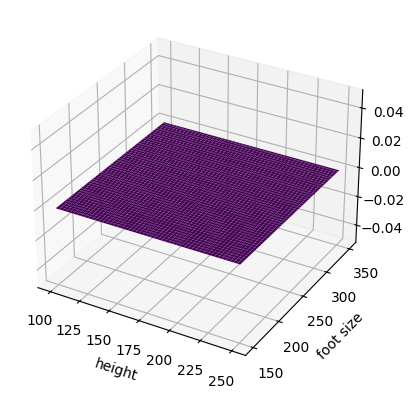

In [27]:
# Group A의 3D multivariate Gaussian distribution

mu_x = mu_a_height
variance_x = var_a_height
mu_y = mu_a_footsize
variance_y = var_a_footsize
cov_matrix_a = [[variance_x, cov_a], [cov_a, variance_y]]
print(variance_x, cov_a, variance_y)
x = np.linspace(100,250,200)
y = np.linspace(150,350,200)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], cov_matrix_a, allow_singular=False) # 수정 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('height')
ax.set_ylabel('foot size')

plt.show()

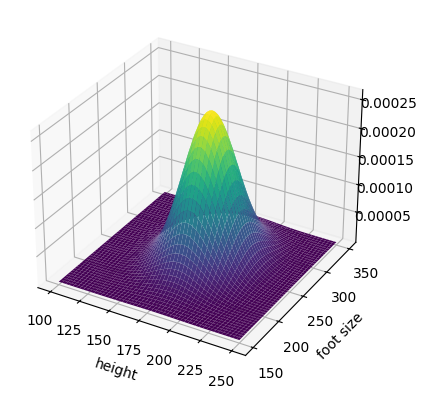

In [26]:
# Group B의 3D multivariate Gaussian distribution

mu_x = mu_b_height
variance_x = var_b_height
mu_y = mu_b_footsize
variance_y = var_b_footsize

x = np.linspace(100,250,200)
y = np.linspace(150,350,200)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('height')
ax.set_ylabel('foot size')

plt.show()

2. When modeling the Gaussian distribution through all the features of Group A and Group
B, calculate which group you have a higher probability of belonging to. Please present the
results without using a library

In [ ]:
# 각 feature의 mean, std 계산

def mean(data):
    return sum(data)/len(data)

def std():